In [51]:
import requests
from requests import get
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import sleep
from random import randint

# This notebook shows the top movies on imdb website.
### The data is scraped off the website after using the advanced search tool.

In [2]:
#initialize empty lists where data will be stored
titles = []
years = []
time = []
imdb_ratings = []
metascores = []
votes = []
us_gross = []

In [3]:
# This makes sure the movie titles are English-translated
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [4]:
# This changes the parameter of the URL, the step parameter shows they are 50 per page
pages = np.arange(1, 1001, 50)

In [28]:

for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&moviemeter=1,1000" + str(page) + "&ref_=adv_nxt", headers=headers)

    soup = BeautifulSoup(page.text, 'html.parser')
  
    movie_div = soup.find_all('div', class_='lister-item mode-advanced')
    
#     This will control the crawl rate on the website
    sleep(randint(2,10))



In [29]:
movie_div

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt1877830"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt1877830/"> <img alt="The Batman" class="loadlate" data-tconst="tt1877830" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDdmMTBiNTYtMDIzNi00NGVlLWIzMDYtZTk3MTQ3NGQxZGEwXkEyXkFqcGdeQXVyMzMwOTU5MDk@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt1877830/">The Batman</a>
 <span class="lister-item-year text-muted unbold">(2022)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">PG-13</span>
 <span class="ghost">|</span>
 <span class="runtime">175 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, 

In [30]:
for container in movie_div:
    
    name = container.h3.a.text
    
    titles.append(name)
    
    year = container.h3.find('span', class_='lister-item-year').text
    years.append(year)

    runtime = container.p.find('span', class_='runtime') if container.p.find('span', class_='runtime') else '-'
    time.append(runtime)

    imdb = float(container.strong.text)
    imdb_ratings.append(imdb)
    
    m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
    metascores.append(m_score)

    nv = container.find_all('span', attrs={'name': 'nv'})
        
    vote = nv[0].text
    votes.append(vote)
        
    grosses = nv[1].text if len(nv) > 1 else '-'
    us_gross.append(grosses)

In [31]:
titles

['Masaan',
 'Millennium Actress',
 'Super 30',
 'Once Upon a Time in Anatolia',
 'Haider',
 'Jean de Florette',
 'Barfi!',
 'Le Dîner de Cons',
 'The Grand Illusion',
 'The Rules of the Game',
 'Beauty and the Beast',
 'Udta Punjab',
 'G.O.R.A.',
 'English Vinglish',
 'Nine Queens',
 'Drishyam 2',
 'Special 26',
 'Tae Guk Gi: The Brotherhood of War',
 "Sullivan's Travels",
 'Asuran',
 'Elite Squad 2: The Enemy Within',
 'Baby',
 'Swades',
 'Sanjuro',
 'Fireworks',
 'Central Station',
 'M.S. Dhoni: The Untold Story',
 'The Muppet Christmas Carol',
 'Zelig',
 'Dev.D',
 'Andaz Apna Apna',
 'A Night at the Opera',
 'Paan Singh Tomar',
 'Veer Zaara',
 'The Circus',
 "Knockin' on Heaven's Door",
 'Sholay',
 'Munna Bhai M.B.B.S.',
 'Carry On, Munna Bhai',
 'The Edge of Heaven',
 'Vicky Donor',
 'OMG: Oh My God!',
 "Let's Go! India",
 'Bhaag Milkha Bhaag',
 'Airlift',
 'The Breath',
 'Udaan',
 'Sarfarosh',
 'Anand',
 'Vizontele',
 'The Batman',
 'Spider-Man: No Way Home',
 'CODA',
 'The Dark K

In [40]:
movies = pd.DataFrame({
'movie': titles,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes,
'us_grossMillions': us_gross,
'timeMin': time
})
movies.dtypes, movies

(movie                object
 year                 object
 imdb                float64
 metascore            object
 votes                object
 us_grossMillions     object
 timeMin              object
 dtype: object,
                            movie    year  imdb   metascore      votes  \
 0                         Masaan  (2015)   8.1           -     27,116   
 1             Millennium Actress  (2001)   7.8  70             26,806   
 2                       Super 30  (2019)   8.0           -     28,951   
 3   Once Upon a Time in Anatolia  (2011)   7.9  82             45,540   
 4                         Haider  (2014)   8.2           -     53,141   
 ..                           ...     ...   ...         ...        ...   
 95        Léon: The Professional  (1994)   8.6  64          1,115,481   
 96                      Watchmen  (2009)   7.7  56            536,279   
 97                   Stand by Me  (1986)   8.1  75            389,563   
 98                    Braveheart  (1995)

In [41]:
# Clean the data
movies['votes'] = movies['votes'].str.replace(',', '').astype(int)

movies.loc[:, 'year'] = movies['year'].str[-5:-1].astype(int)

movies['timeMin'] = movies['timeMin'].astype(str)
movies['timeMin'] = movies['timeMin'].str.extract('(\d+)').astype(int)

# (‘(\d+’) extracts all the digits in the string from the column metascore
movies['metascore'] = movies['metascore'].str.extract('(\d+)')

# converts the column to float, and the rest to NaN
movies['metascore'] = pd.to_numeric(movies['metascore'], errors='coerce')

movies['us_grossMillions'] = movies['us_grossMillions'].map(lambda x: x.lstrip('$').rstrip('M'))
movies['us_grossMillions'] = pd.to_numeric(movies['us_grossMillions'], errors='coerce')

In [13]:
movies

,movie,year,imdb,metascore,votes,us_grossMillions,timeMin
0,Masaan,2015,8.1,NaN,27116,-,109
1,Millennium Actress,2001,7.8,70.0,26806,$0.19M,87
2,Super 30,2019,8.0,NaN,28951,$2.27M,154
3,Once Upon a Time in Anatolia,2011,7.9,82.0,45540,$0.14M,157
4,Haider,2014,8.2,NaN,53141,$0.90M,160
5,Jean de Florette,1986,8.1,NaN,25421,$4.94M,120
6,Barfi!,2012,8.2,NaN,80190,$2.80M,151
7,Le Dîner de Cons,1998,7.6,73.0,40871,$4.07M,80
8,The Grand Illusion,1937,8.1,NaN,36011,$0.17M,113
9,The Rules of the Game,1939,7.9,NaN,28504,-,110


In [14]:
movies.dtypes

movie                object
year                  int32
imdb                float64
metascore           float64
votes                 int32
us_grossMillions     object
timeMin               int32
dtype: object

In [42]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie             100 non-null    object 
 1   year              100 non-null    int32  
 2   imdb              100 non-null    float64
 3   metascore         63 non-null     float64
 4   votes             100 non-null    int32  
 5   us_grossMillions  76 non-null     float64
 6   timeMin           100 non-null    int32  
dtypes: float64(3), int32(3), object(1)
memory usage: 4.4+ KB


In [43]:
# to see where you're missing data and how much data is missing 
print(movies.isnull().sum())

movie                0
year                 0
imdb                 0
metascore           37
votes                0
us_grossMillions    24
timeMin              0
dtype: int64


In [45]:
# to move all your scraped data to a CSV file
movies.to_csv('topMovies.csv')

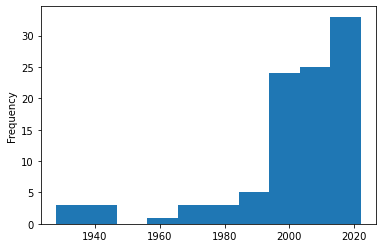

In [76]:
# This shows a plot with the years.
movies['year'].plot(kind = "hist")
plt.show()